In [1]:
import os

import bilby
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import dill

from tqdm import tqdm

import util

In [2]:
dphi = ["d_phi_0", "d_phi_1", "d_phi_2", "d_phi_3", "d_phi_4", "d_phi_5L", "d_phi_6", "d_phi_6L", "d_phi_7"]
dalpha = ["d_alpha_2", "d_alpha_3", "d_alpha_4"]
dbeta = ["d_beta_2", "d_beta_3"]

dpi = dphi + dalpha + dbeta

In [3]:
dphi_labels = [
    "$" + s.replace("d_", "\\delta \\var").replace("5L", "{5L}").replace("6L", "{6L}") + "$" for s in dphi
]

dpi_labels = dphi_labels + [
    "$" + s.replace("d_", "\\delta \\") + "$" for s in (dalpha + dbeta)
]

In [4]:
def results_to_violinplot_data(parentdir, prefix, extra_hybrid_label=None, extra_hybrid_no_overlap_label="no-overlap"):
    hybrid_results, nest_results, nest0_results, hybrid_overlap0_results = util.load_combo_results(
        parentdir, prefix, 
        extra_hybrid_label=extra_hybrid_label, 
        extra_hybrid_no_overlap_label=extra_hybrid_no_overlap_label
    )

    hybrid_data = []
    hybrid0_data = []
    nest_data = []
    nest0_data = []

    lots_of_nans = np.tile(np.nan, 100)

    for i in range(len(dpi)):
        if hybrid_results[i] is not None:
            hybrid_data.append(
                hybrid_results[i].samples[:,10]
            )
        else:
            hybrid_data.append(lots_of_nans)
            
        if hybrid_overlap0_results[i] is not None:
            hybrid0_data.append(
                hybrid_overlap0_results[i].samples[:,10]
            )
        else:
            hybrid0_data.append(lots_of_nans)
            
        if nest_results[i] is not None:
            nest_data.append(
                nest_results[i].samples[:,10]
            )
        else:
            nest_data.append(lots_of_nans)
            
        if nest0_results[i] is not None:
            nest0_data.append(
                nest0_results[i].samples[:,10]
            )
        else:
            nest0_data.append(lots_of_nans)

    return hybrid_data, hybrid0_data, nest_data, nest0_data

In [5]:
hybrid_color = "#3a0ca3" #"#3C096C" #"#62205f"
hybrid_overlap0_color = "#b5179e" #"#bb292c"
nest0_color    = "#4895ef"
dpi_vals=[0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Low SNR

In [6]:
lowsnr_hybrid_data, lownsr_hybrid0_data, _, lowsnr_nest0_data = results_to_violinplot_data(
    "/home/noah.wolfe/MA499_report_runs/injected/beyond-gr/SNR/beyond-gr_d_phi_2-2E-01_dL-1000",
    "beyond-gr_d_phi_2-2E-01_dL-1000",
    extra_hybrid_label="overlap-0.9_fft-overlap-test",
    extra_hybrid_no_overlap_label="overlap-0.0_fft-overlap-test"
)

100%|██████████| 14/14 [00:27<00:00,  1.93s/it]


/home/noah.wolfe/.conda/envs/testing-gr/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/noah.wolfe/.conda/envs/testing-gr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


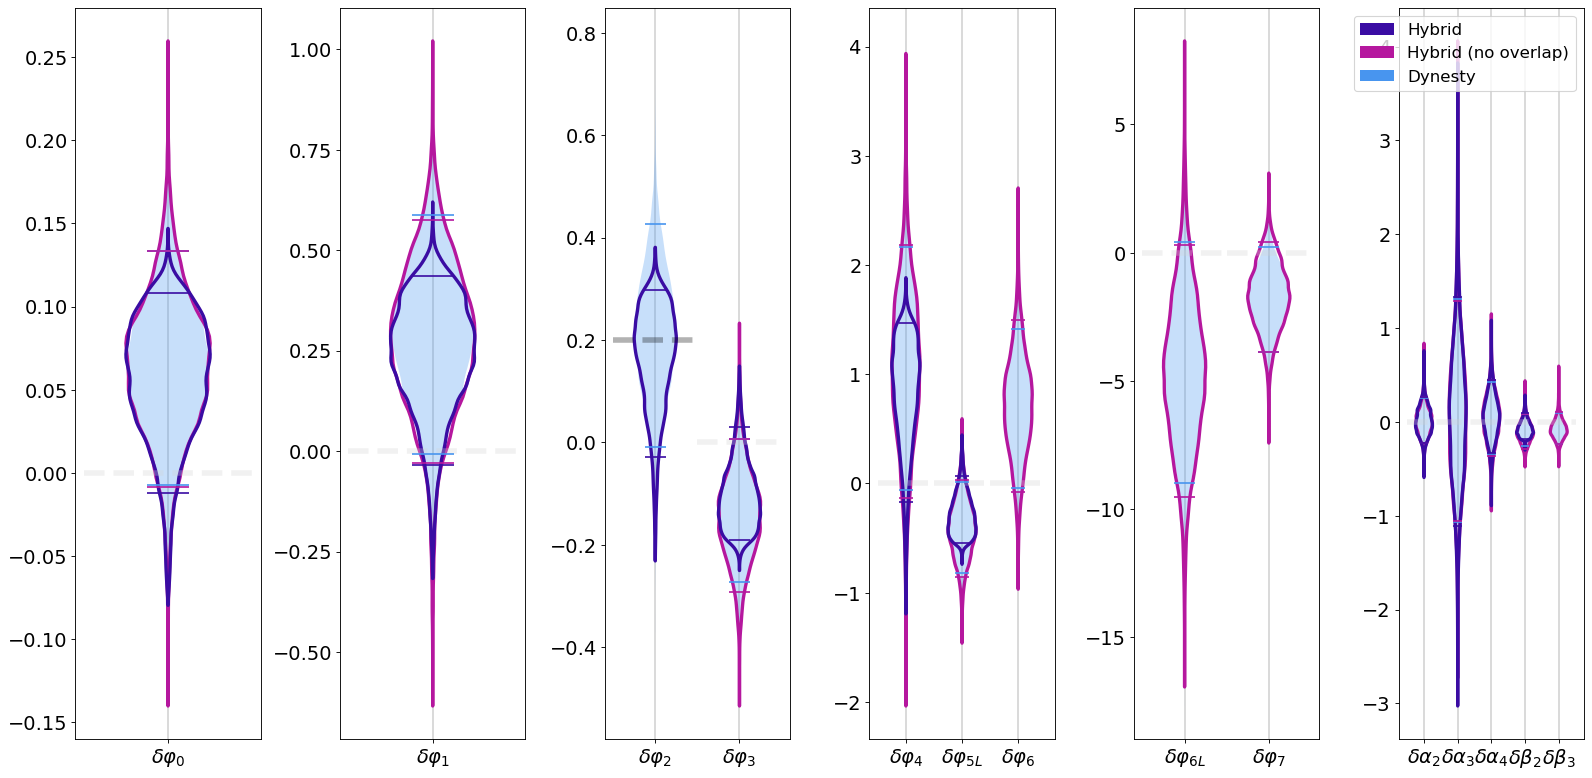

In [7]:
fig_l, axes_l = plt.subplots(figsize=(20,8),dpi=80, nrows=1,ncols=6)

for i,v in enumerate([
    [0], [1], [2,3], [4,5,6], [7,8], [9,10,11,12,13]
]):

    #axes_l[i].axhline(y=0, color="#d3d3d3", linestyle="--", linewidth=5, alpha=0.3)

    for j in v:
        if dpi_vals[j] == 0:
            hline_color = "#d3d3d3"
        else:
            hline_color = "black"
        
        axes_l[i].hlines( dpi_vals[j], j - 0.5, j + 0.5, colors=[hline_color], linestyles=["--"], linewidths=[5], alpha=[0.3] )

        axes_l[i].axvline(x=j,color="#d3d3d3",zorder=-1) # vertical line, in light gray, to guide the eye (to correlate dpi label to plot)

        nest0_dists = axes_l[i].violinplot( lowsnr_nest0_data[j], [j], quantiles=[0.05, 0.95], showextrema=False)
        hybrid_overlap0_dists = axes_l[i].violinplot( lownsr_hybrid0_data[j], [j], quantiles=[0.05, 0.95], showextrema=False )
        hybrid_dists = axes_l[i].violinplot( lowsnr_hybrid_data[j], [j], quantiles=[0.05, 0.95], showextrema=False )
        
        for partname in ('cquantiles',):
            hybrid_dists[partname].set_edgecolor(hybrid_color)
            hybrid_overlap0_dists[partname].set_edgecolor(hybrid_overlap0_color)
            nest0_dists[partname].set_edgecolor(nest0_color)
        
        for pc in hybrid_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_color)
            pc.set_linewidth(3)
            pc.set_alpha(1)
            
        for pc in hybrid_overlap0_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_overlap0_color)
            pc.set_linewidth(3)
            pc.set_alpha(1)

        for pc in nest0_dists['bodies']:
            pc.set_facecolor(nest0_color)
            #pc.set_edgecolor('black')
        
    axes_l[i].set_xticks(v)
    axes_l[i].set_xticklabels( dpi_labels[v[0]:v[-1]+1] ) 
    
    axes_l[i].tick_params(labelsize=17.5)
            
    axes_l[i].set_xticks(v)
    axes_l[i].set_xticklabels( dpi_labels[v[0]:v[-1]+1] ) 

    axes_l[i].tick_params(labelsize=17.5)

axes_l[-1].legend(
    [ mpl.patches.Patch(facecolor=hybrid_color), mpl.patches.Patch(facecolor=hybrid_overlap0_color), mpl.patches.Patch(facecolor=nest0_color) ],
    [ "Hybrid", "Hybrid (no overlap)", "Dynesty" ],
    fontsize=15
)
    
plt.tight_layout()
fig_l.set_figwidth(20)
fig_l.set_figheight(10)

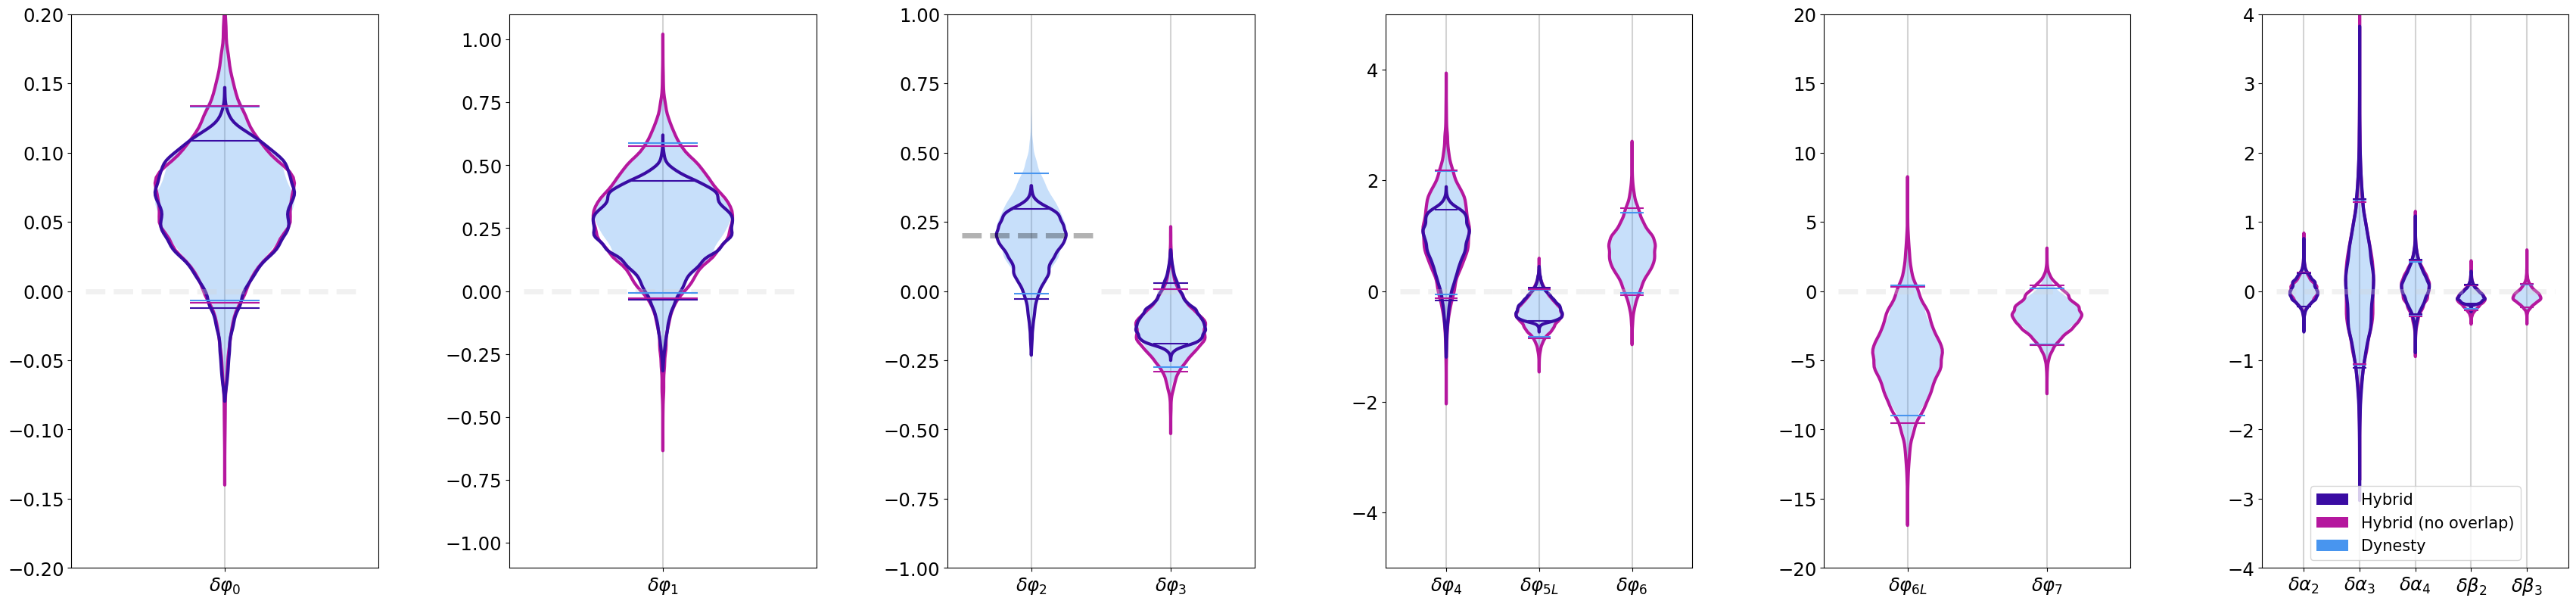

In [8]:
axes_l[0].set_ylim(-0.2,0.2)
axes_l[1].set_ylim(-1.1,1.1)
axes_l[2].set_ylim(-1,1)
axes_l[3].set_ylim(-5,5)
axes_l[4].set_ylim(-20,20)
axes_l[5].set_ylim(-4,4)

fig_l.set_figwidth(35)
fig_l.set_figheight(8)
fig_l.set_dpi(100)
fig_l

/home/noah.wolfe/.conda/envs/testing-gr/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/noah.wolfe/.conda/envs/testing-gr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


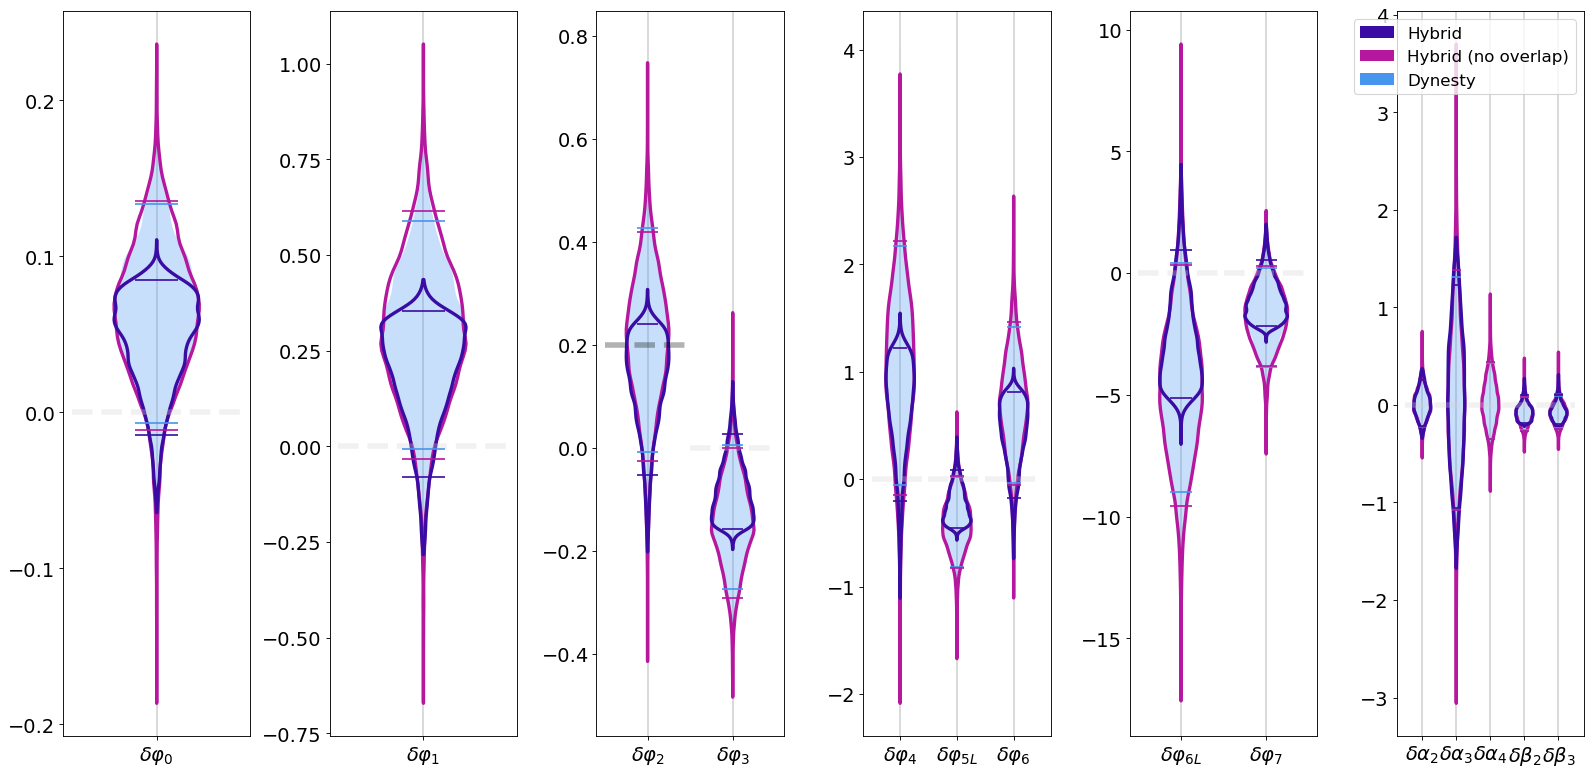

In [23]:
fig_l, axes_l = plt.subplots(figsize=(20,8),dpi=80, nrows=1,ncols=6)

for i,v in enumerate([
    [0], [1], [2,3], [4,5,6], [7,8], [9,10,11,12,13]
]):

    #axes_l[i].axhline(y=0, color="#d3d3d3", linestyle="--", linewidth=5, alpha=0.3)

    for j in v:
        if dpi_vals[j] == 0:
            hline_color = "#d3d3d3"
        else:
            hline_color = "black"
        
        axes_l[i].hlines( dpi_vals[j], j - 0.5, j + 0.5, colors=[hline_color], linestyles=["--"], linewidths=[5], alpha=[0.3] )

        axes_l[i].axvline(x=j,color="#d3d3d3",zorder=-1) # vertical line, in light gray, to guide the eye (to correlate dpi label to plot)

        nest0_dists = axes_l[i].violinplot( lowsnr_nest0_data[j], [j], quantiles=[0.05, 0.95], showextrema=False)
        hybrid_overlap0_dists = axes_l[i].violinplot( lownsr_hybrid0_data[j], [j], quantiles=[0.05, 0.95], showextrema=False )
        hybrid_dists = axes_l[i].violinplot( lowsnr_hybrid_data[j], [j], quantiles=[0.05, 0.95], showextrema=False )
        
        for partname in ('cquantiles',):
            hybrid_dists[partname].set_edgecolor(hybrid_color)
            hybrid_overlap0_dists[partname].set_edgecolor(hybrid_overlap0_color)
            nest0_dists[partname].set_edgecolor(nest0_color)
        
        for pc in hybrid_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_color)
            pc.set_linewidth(3)
            pc.set_alpha(1)
            
        for pc in hybrid_overlap0_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_overlap0_color)
            pc.set_linewidth(3)
            pc.set_alpha(1)

        for pc in nest0_dists['bodies']:
            pc.set_facecolor(nest0_color)
            #pc.set_edgecolor('black')
        
    axes_l[i].set_xticks(v)
    axes_l[i].set_xticklabels( dpi_labels[v[0]:v[-1]+1] ) 
    
    axes_l[i].tick_params(labelsize=17.5)
            
    axes_l[i].set_xticks(v)
    axes_l[i].set_xticklabels( dpi_labels[v[0]:v[-1]+1] ) 

    axes_l[i].tick_params(labelsize=17.5)

axes_l[-1].legend(
    [ mpl.patches.Patch(facecolor=hybrid_color), mpl.patches.Patch(facecolor=hybrid_overlap0_color), mpl.patches.Patch(facecolor=nest0_color) ],
    [ "Hybrid", "Hybrid (no overlap)", "Dynesty" ],
    fontsize=15
)
    
plt.tight_layout()
fig_l.set_figwidth(20)
fig_l.set_figheight(10)

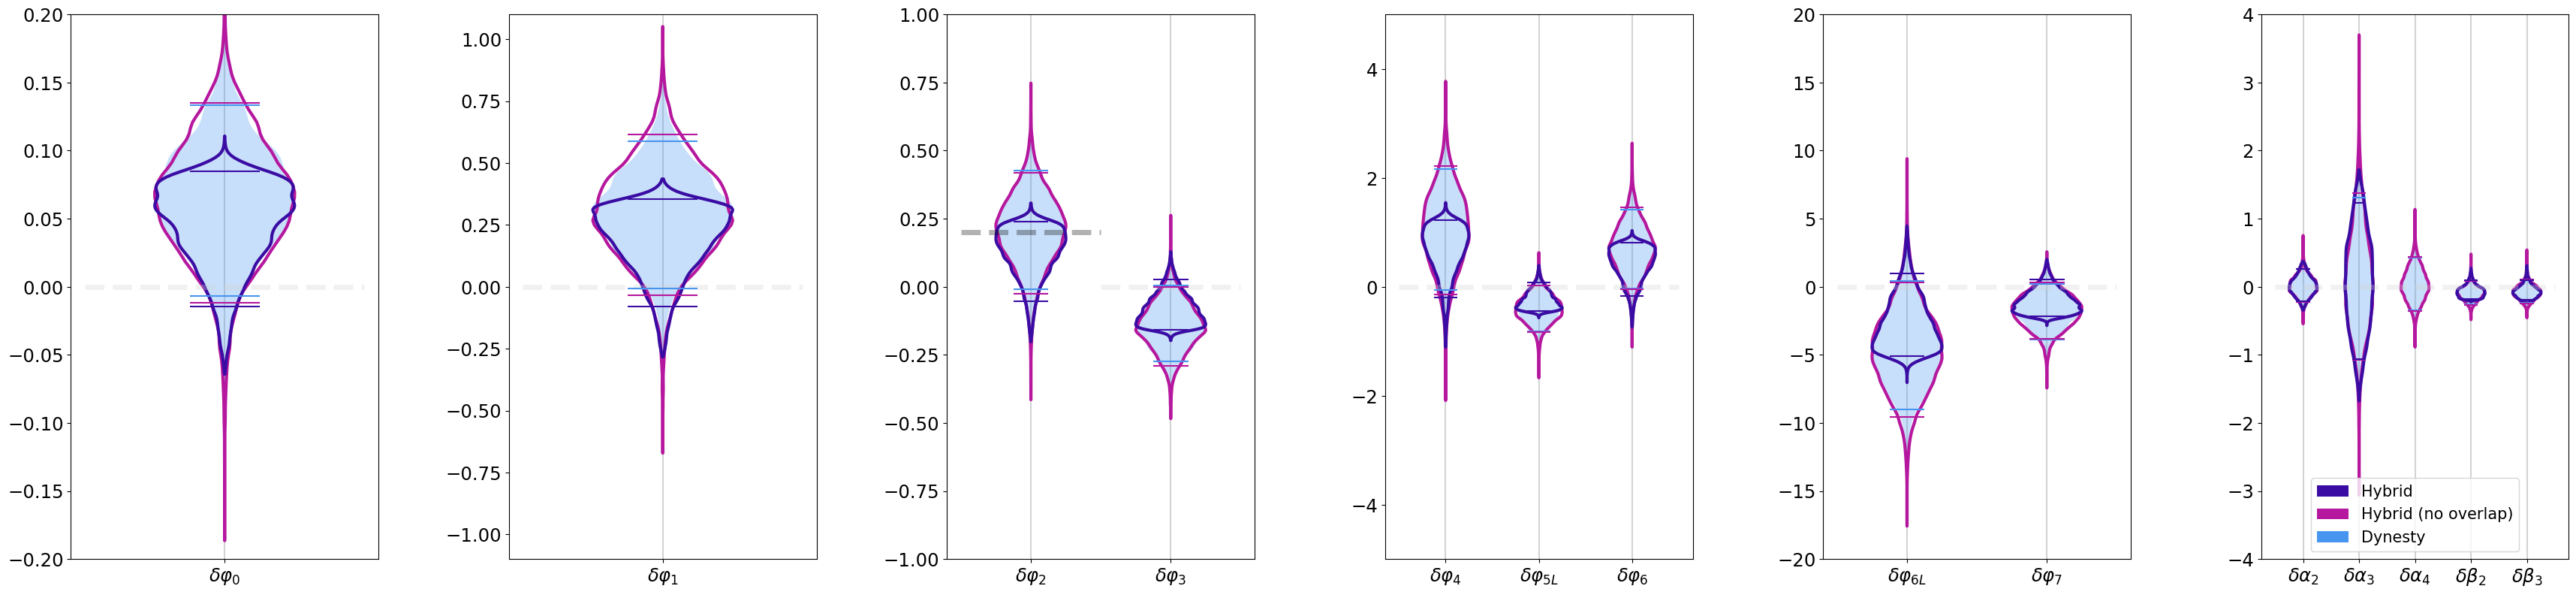

In [24]:
axes_l[0].set_ylim(-0.2,0.2)
axes_l[1].set_ylim(-1.1,1.1)
axes_l[2].set_ylim(-1,1)
axes_l[3].set_ylim(-5,5)
axes_l[4].set_ylim(-20,20)
axes_l[5].set_ylim(-4,4)

fig_l.set_figwidth(35)
fig_l.set_figheight(8)
fig_l.set_dpi(100)
fig_l

# High SNR

In [7]:
highsnr_hybrid_data, highsnr_hybrid0_data, _, highsnr_nest0_data = results_to_violinplot_data(
    "/home/noah.wolfe/MA499_report_runs/injected/beyond-gr/SNR/beyond-gr_d_phi_2-2E-01_dL-100",
    "beyond-gr_d_phi_2-2E-01_dL-100"
)

100%|██████████| 14/14 [00:25<00:00,  1.85s/it]


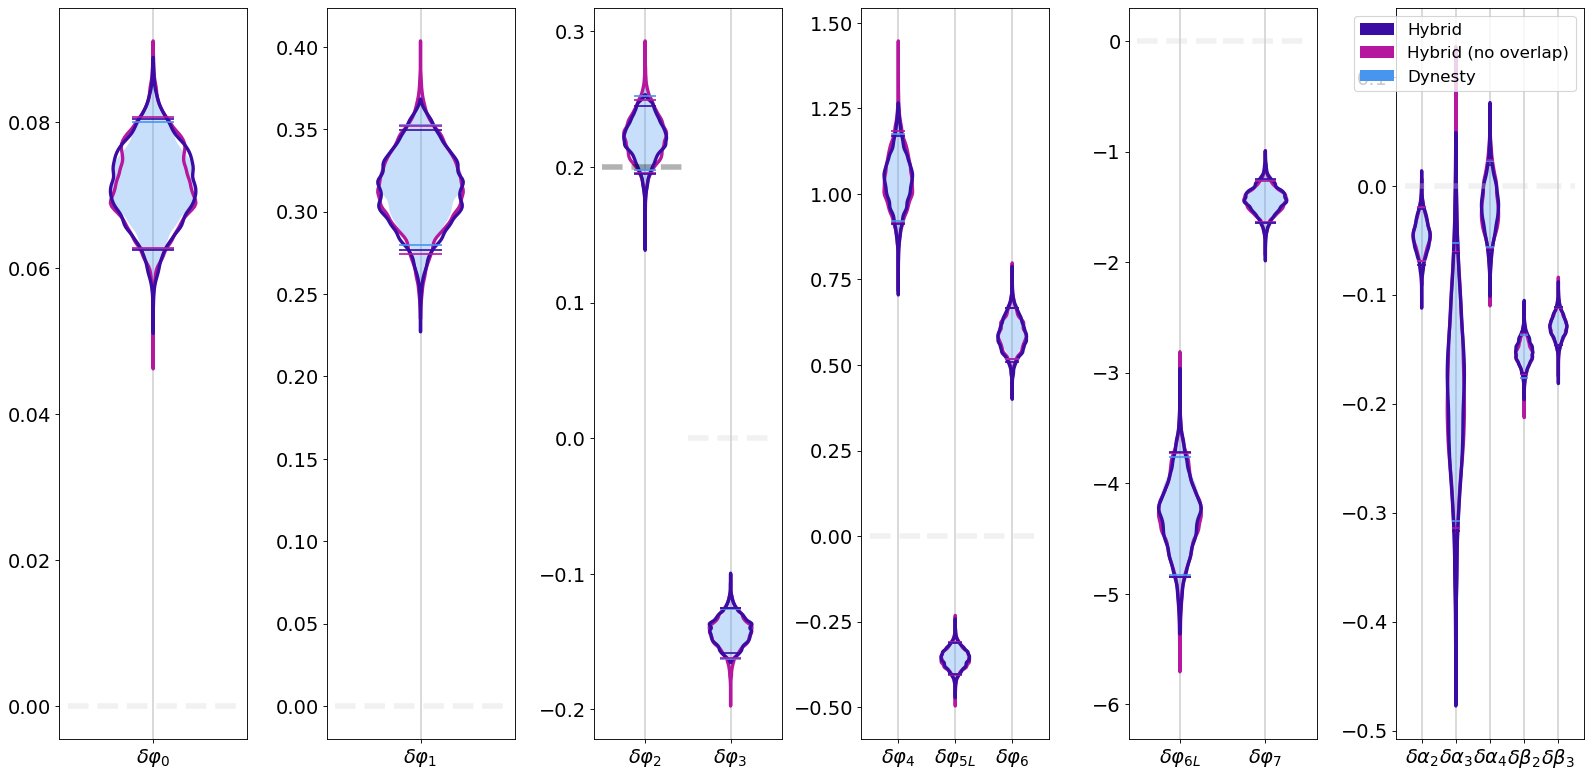

In [25]:
fig_h, axes_h = plt.subplots(figsize=(20,8),dpi=80, nrows=1,ncols=6)

for i,v in enumerate([
    [0], [1], [2,3], [4,5,6], [7,8], [9,10,11,12,13]
]):

    #axes_l[i].axhline(y=0, color="#d3d3d3", linestyle="--", linewidth=5, alpha=0.3)

    for j in v:
        if dpi_vals[j] == 0:
            hline_color = "#d3d3d3"
        else:
            hline_color = "black"
        
        axes_h[i].hlines( dpi_vals[j], j - 0.5, j + 0.5, colors=[hline_color], linestyles=["--"], linewidths=[5], alpha=[0.3] )

        axes_h[i].axvline(x=j,color="#d3d3d3",zorder=-1) # vertical line, in light gray, to guide the eye (to correlate dpi label to plot)

        nest0_dists = axes_h[i].violinplot( highsnr_nest0_data[j], [j], quantiles=[0.05, 0.95], showextrema=False)
        hybrid_overlap0_dists = axes_h[i].violinplot( highsnr_hybrid0_data[j], [j], quantiles=[0.05, 0.95], showextrema=False )
        hybrid_dists = axes_h[i].violinplot( highsnr_hybrid_data[j], [j], quantiles=[0.05, 0.95], showextrema=False )
        
        for partname in ('cquantiles',):
            hybrid_dists[partname].set_edgecolor(hybrid_color)
            hybrid_overlap0_dists[partname].set_edgecolor(hybrid_overlap0_color)
            nest0_dists[partname].set_edgecolor(nest0_color)
        
        for pc in hybrid_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_color)
            pc.set_linewidth(3)
            pc.set_alpha(1)
            
        for pc in hybrid_overlap0_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_overlap0_color)
            pc.set_linewidth(3)
            pc.set_alpha(1)

        for pc in nest0_dists['bodies']:
            pc.set_facecolor(nest0_color)
            #pc.set_edgecolor('black')
        
    axes_h[i].set_xticks(v)
    axes_h[i].set_xticklabels( dpi_labels[v[0]:v[-1]+1] ) 
    
    axes_h[i].tick_params(labelsize=17.5)
            
    axes_h[i].set_xticks(v)
    axes_h[i].set_xticklabels( dpi_labels[v[0]:v[-1]+1] ) 

    axes_h[i].tick_params(labelsize=17.5)

axes_h[-1].legend(
    [ mpl.patches.Patch(facecolor=hybrid_color), mpl.patches.Patch(facecolor=hybrid_overlap0_color), mpl.patches.Patch(facecolor=nest0_color) ],
    [ "Hybrid", "Hybrid (no overlap)", "Dynesty" ],
    fontsize=15
)
    
plt.tight_layout()
fig_h.set_figwidth(20)
fig_h.set_figheight(10)

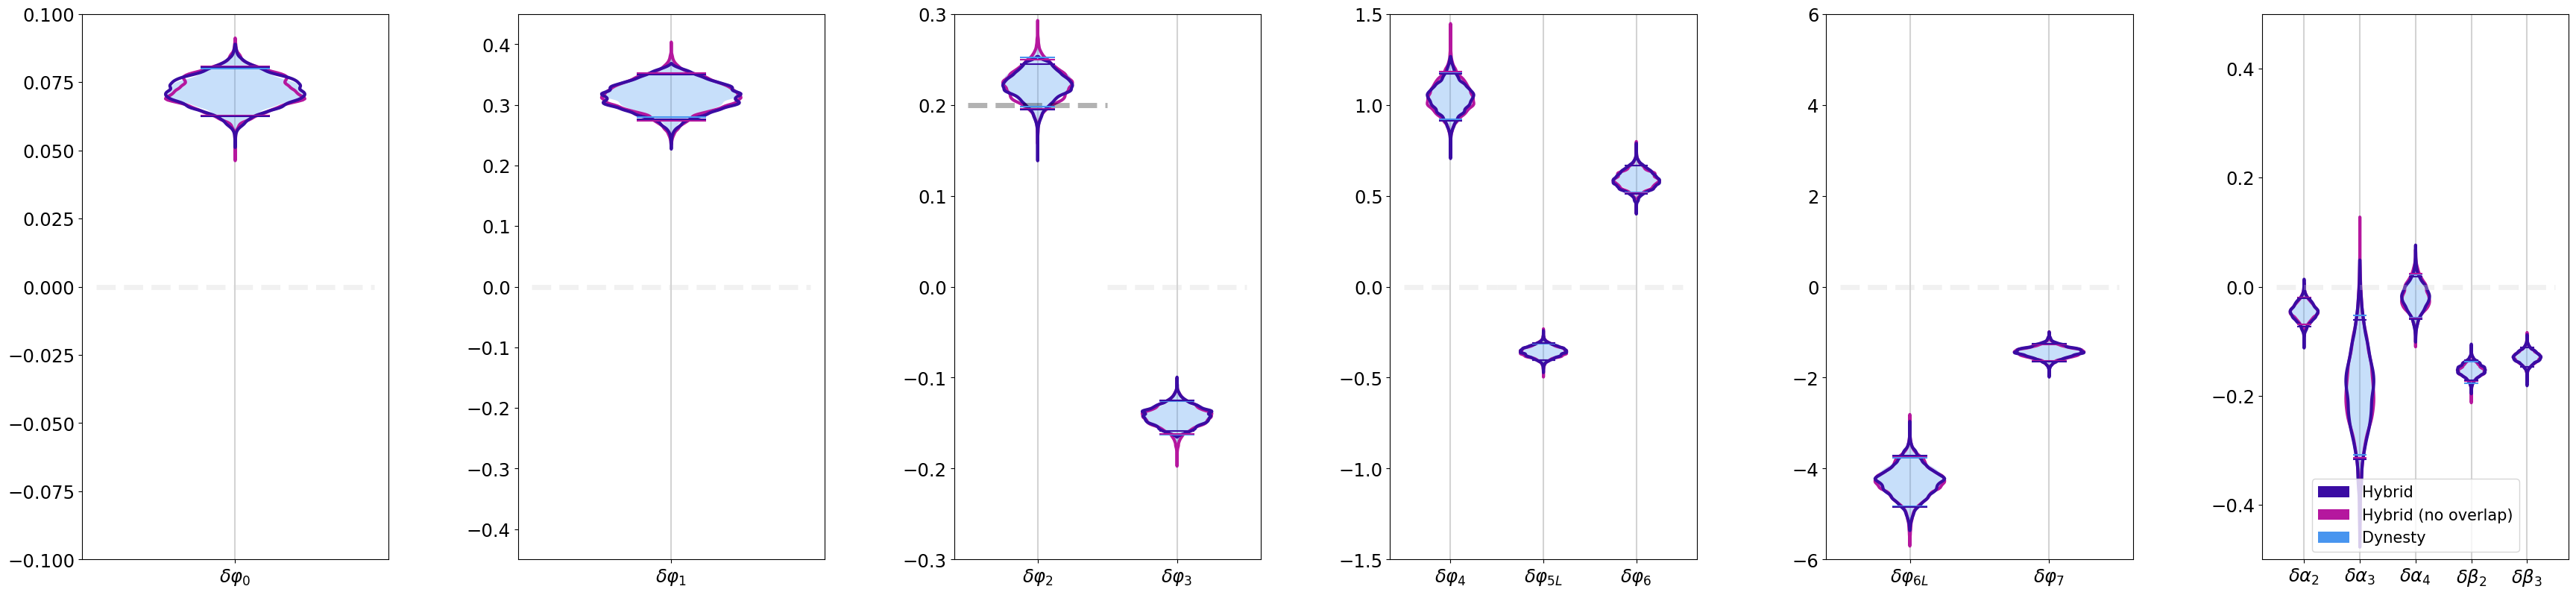

In [26]:
axes_h[0].set_ylim(-0.1,0.1)
axes_h[1].set_ylim(-0.45,0.45)
axes_h[2].set_ylim(-0.3,0.3)
axes_h[3].set_ylim(-1.5,1.5)
axes_h[4].set_ylim(-6,6)
axes_h[5].set_ylim(-0.5,0.5)

fig_h.set_figwidth(35)
fig_h.set_figheight(8)
fig_h.set_dpi(100)
fig_h

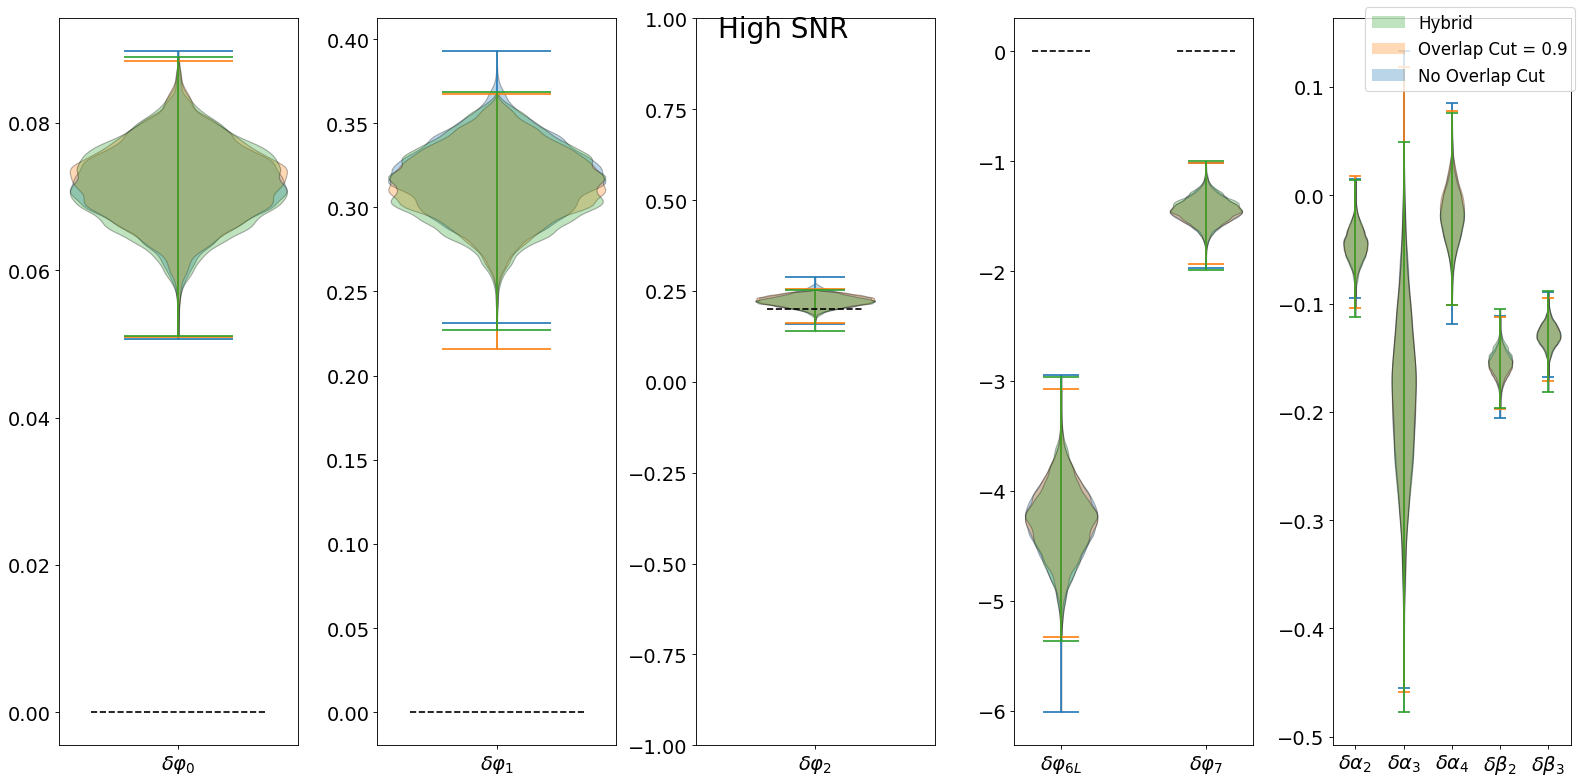

In [15]:
axes_h[2].set_ylim(-1,1)
axes_h[2].set_xlim(1.5,2.5)
fig_h

# Old

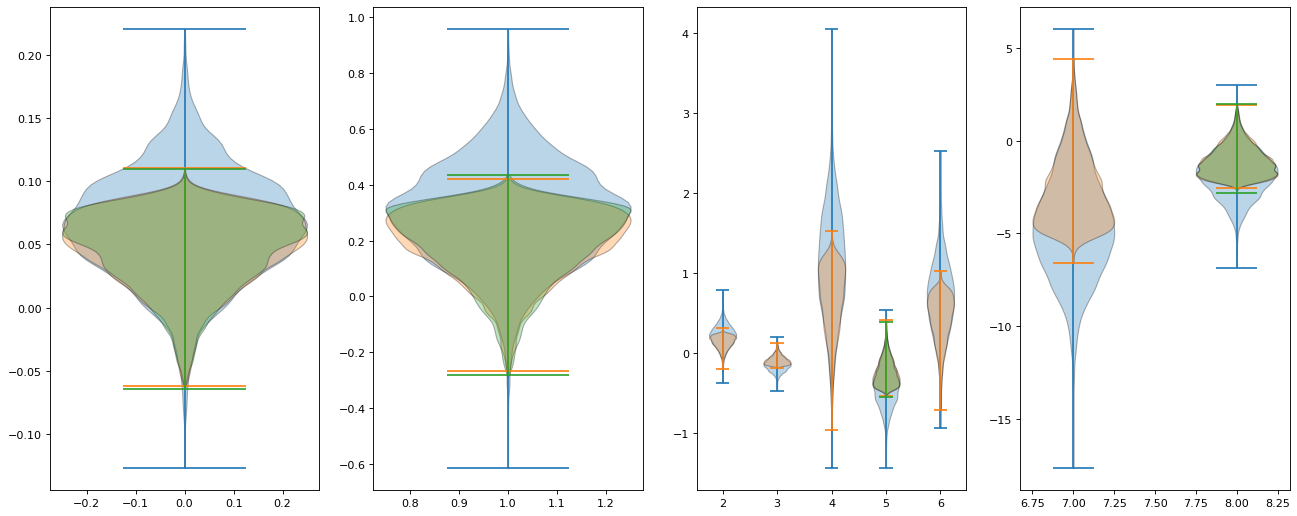

In [55]:
fig, axes = plt.subplots(figsize=(20,8),dpi=80, nrows=1,ncols=4)

cool_colors = [ 
    "#a56457", "#ffb178", "#ffc680", 
    "#db8872", "#dfbbc8", "#b08ba5", "#7c668c"
]       

overlap0_color = "C0" #"#f5c34d" #cool_colors[2]
nest_color = "C1" #"#e67424" #cool_colors[0]
hybrid_color = "C2" #"#8d1c06" #cool_colors[-1]

for i,v in enumerate([
    [0], [1], [2,3,4,5,6], [7,8]
]):
    for j in v:
        nest0_dists = axes[i].violinplot( nest0_data[j], [j] ) 
        nest_dists = axes[i].violinplot( nest_data[j], [j] )
        pt_dists = axes[i].violinplot( hybrid_data[j], [j] )

        for partname in ('cbars','cmins','cmaxes'):
            nest0_dists[partname].set_edgecolor(overlap0_color)
            nest_dists[partname].set_edgecolor(nest_color)
            pt_dists[partname].set_edgecolor(hybrid_color)
            
            
        for pc in nest0_dists['bodies']:
            pc.set_facecolor(overlap0_color)
            pc.set_edgecolor('black')
            
        for pc in nest_dists['bodies']:
            pc.set_facecolor(nest_color)
            pc.set_edgecolor('black')
            
        for pc in pt_dists['bodies']:
            pc.set_facecolor(hybrid_color)
            pc.set_edgecolor('black')
        
#_ = axes[1].violinplot( hybrid_data[1], [1] ) 
#_ = axes[1].violinplot( nest_data[1], [1] )
#_ = axes[1].violinplot( nest0_data[1], [1] )

#_ = axes[2].violinplot( hybrid_data[2:7], [2,3,4,5,6] ) 
#_ = axes[2].violinplot( nest_data[2:7], [2,3,4,5,6] )
#_ = axes[2].violinplot( nest0_data[2:7], [2,3,4,5,6] )

#_ = axes[3].violinplot( hybrid_data[7:9], [7,8] ) 
#_ = axes[3].violinplot( nest_data[7:9], [7,8] )
#_ = axes[3].violinplot( nest0_data[7:9], [7,8] )

#ax.set_xticks([0,1,2,3,4,5,6,7])
#ax.set_xticklabels([ r"$\varphi_%d$" % i for i in range(0,8) ])

#ax.set_xlabel(r"$p_i$", fontsize=20)
#ax.set_ylabel(r"$\delta \varphi_i$", fontsize=20)
#ax.tick_params(labelsize=17.5)

In [56]:
axes[0].set_xticks([0])
axes[0].set_xticklabels([dpi_labels[0]])

axes[1].set_xticks([1])
axes[1].set_xticklabels([dpi_labels[1]])

axes[2].set_xticks([2,3,4,5,6])
axes[2].set_xticklabels(dpi_labels[2:7])

axes[3].set_xticks([7,8])
axes[3].set_xticklabels(dpi_labels[7:9])

[Text(7, 0, '$\\delta \\varphi_{6L}$'), Text(8, 0, '$\\delta \\varphi_7$')]

In [57]:
for ax in fig.get_axes():
    ax.tick_params(labelsize=17.5)

In [58]:
import matplotlib as mpl

violin_hybrid_color = pt_dists["bodies"][0].get_facecolor().flatten()
violin_overlap0_color = nest0_dists["bodies"][0].get_facecolor().flatten()
violin_color = nest_dists["bodies"][0].get_facecolor().flatten()

fig.legend(
    [
        mpl.patches.Patch(facecolor=violin_hybrid_color),
        mpl.patches.Patch(facecolor=violin_color),
        mpl.patches.Patch(facecolor=violin_overlap0_color), 

    ],
    [ "Hybrid", "Overlap Cut = 0.9", "No Overlap Cut",  ],
    fontsize=15
)

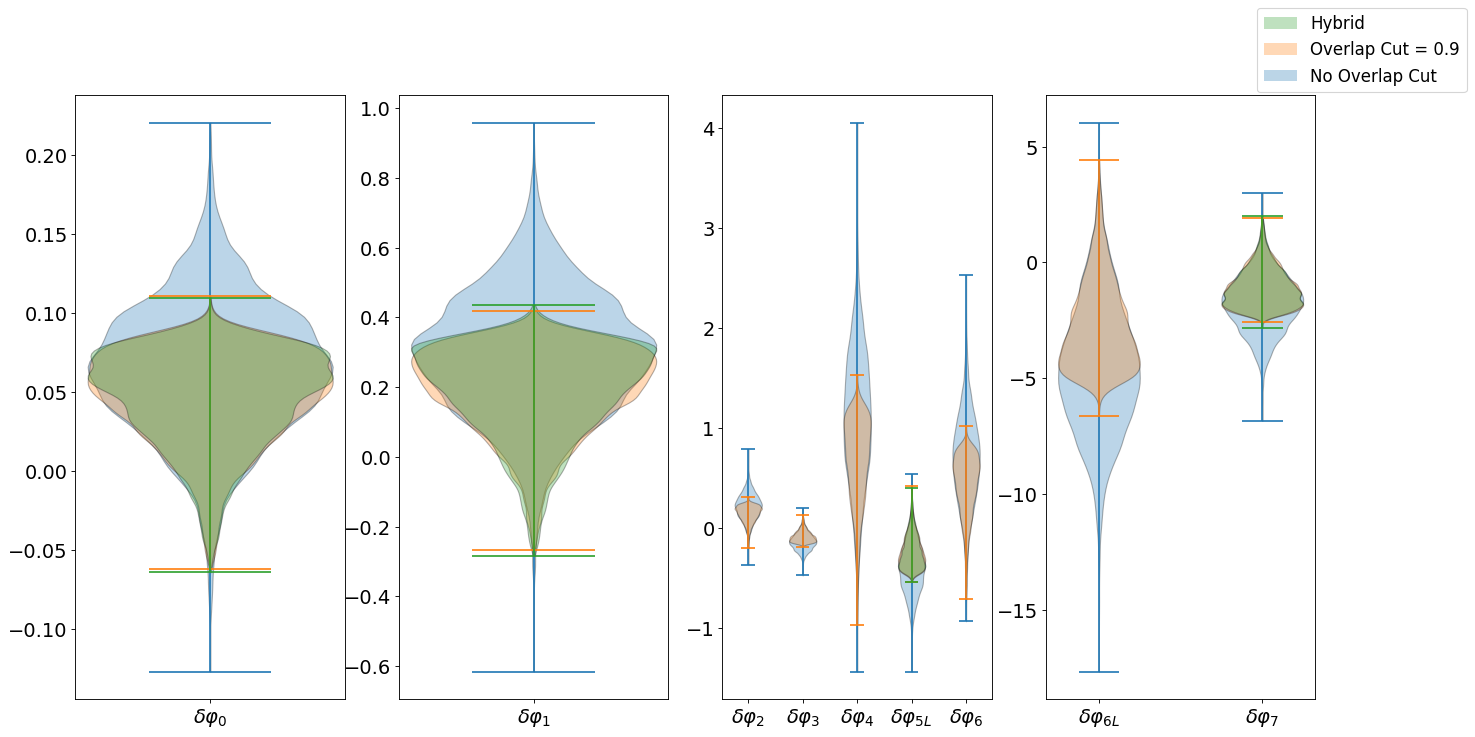

<Figure size 432x288 with 0 Axes>

In [59]:
plt.tight_layout()
fig.set_figwidth(20)
fig.set_figheight(10)
fig

In [23]:
for res in nest_overlap0_results

In [60]:
axes[0].hlines(dpi_vals[0],-0.2,0.2,colors=["black"],linestyles=["--"])
axes[1].hlines(dpi_vals[1],0.8,1.2,colors=["black"],linestyles=["--"])
for i in range(2,7):
    axes[2].hlines(dpi_vals[i],i-0.2,i+0.2,colors=["black"],linestyles=["--"])
axes[3].hlines(dpi_vals[7],6.8,7.2,colors=["black"],linestyles=["--"])
axes[3].hlines(dpi_vals[8],7.8,8.2,colors=["black"],linestyles=["--"])

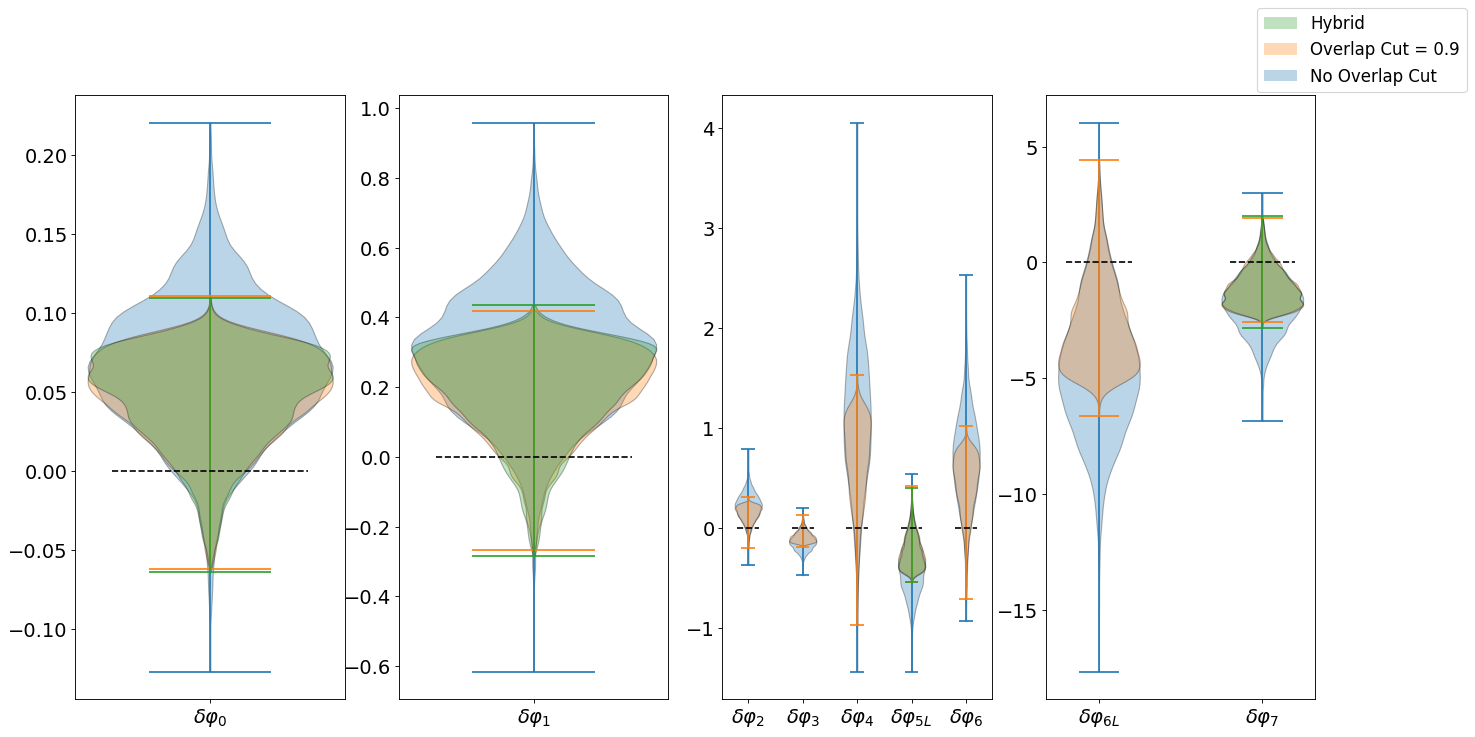

In [61]:
fig